In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = "retina"
from pathlib import Path
import os
from IPython.display import display, Markdown, Latex

project_dir = Path(globals()['_dh'][0]+"/../python").resolve()
os.chdir(project_dir)
print("Running notebook from: " + os.path.abspath(""))


from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last_expr" # Default jupyter behavior
InteractiveShell.ast_node_interactivity = "all" # All expressions are shown.

Running notebook from: /Users/aleph/Documents/jota/tesis/ts_mcfrl/python


In [121]:
#movement_detail_report = pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/dqn_few_warehouses_v4__l1loss/movement_detail_report.csv")
#movement_detail_report = pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/dqn_few_warehouses_v4__l2loss/movement_detail_report.csv") # the real one
#movement_detail_report = pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/dqn_few_warehouses_v4__l2loss_debug2/movement_detail_report.csv") # the small one
movement_detail_report = pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/dqn_few_warehouses_v4__l2loss_bugfix/movement_detail_report.csv") # the real, fixed?

Thiis weird: gonna explore. Later.

In [122]:
movement_detail_report[(movement_detail_report.movement_type=="Delivery") & (movement_detail_report.episode == 0)].groupby("source_name")['customer_units'].sum()

source_name
dcs_0     581636
dcs_1     654625
dcs_2    1031089
Name: customer_units, dtype: int64

In [123]:
movement_detail_report[(movement_detail_report.episode == 0)  & (movement_detail_report.movement_type=="Delivery")].is_big_m.sum()
movement_detail_report[(movement_detail_report.episode == 0)  & (movement_detail_report.movement_type!="Delivery")].is_big_m.sum()

47

0

Calculate interplants: 

In [124]:
transports = movement_detail_report[(movement_detail_report.episode == 0)  & (movement_detail_report.movement_type=="Transportation")]

# total interplants 
total_interplants = transports.transportation_units.sum()

# interplants per incoming
incoming_interplants = transports.groupby("destination_name")['transportation_units'].sum()
incoming_interplants.to_dict()

transports

{'dcs_0': 448578, 'dcs_2': 599653}

,source_name,destination_name,source_time,destination_time,commodity,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost,is_big_m,episode
0,dcs_1,dcs_2,2,2,34,DC,DC,Transportation,84072,840720,0,0,0,0,False,0
1,dcs_1,dcs_0,4,4,34,DC,DC,Transportation,63586,635860,0,0,0,0,False,0
2,dcs_2,dcs_0,4,4,34,DC,DC,Transportation,7321,73210,0,0,0,0,False,0
13,dcs_1,dcs_2,7,7,34,DC,DC,Transportation,22843,228430,0,0,0,0,False,0
19,dcs_1,dcs_2,8,8,34,DC,DC,Transportation,11798,117980,0,0,0,0,False,0
25,dcs_2,dcs_0,9,9,34,DC,DC,Transportation,1488,14880,0,0,0,0,False,0
31,dcs_1,dcs_0,10,10,34,DC,DC,Transportation,40750,407500,0,0,0,0,False,0
37,dcs_1,dcs_0,11,11,34,DC,DC,Transportation,161583,1615830,0,0,0,0,False,0
38,dcs_2,dcs_0,11,11,34,DC,DC,Transportation,9761,97610,0,0,0,0,False,0
54,dcs_1,dcs_0,14,14,34,DC,DC,Transportation,85298,852980,0,0,0,0,False,0


Assingments per DC

In [125]:
deliveries = movement_detail_report[(movement_detail_report.movement_type=="Delivery")]
deliveries_per_shipping_point = deliveries.groupby(['source_name'])['customer_units'].sum().to_dict()
deliveries_per_shipping_point

{'dcs_0': 28111680, 'dcs_1': 26086484, 'dcs_2': 26263571}

In [126]:
deliveries_per_shipping_point_orders = deliveries.drop_duplicates(["source_name","destination_name","source_time","destination_time"]).groupby("source_name").size().to_dict()
deliveries_per_shipping_point_orders

{'dcs_0': 1121, 'dcs_1': 1175, 'dcs_2': 1125}

In [127]:
deliveries_100 = deliveries.query('episode=="1"')
deliveries.episode.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [136]:
deliveries.query("episode==0").groupby(['source_name','destination_name','source_time']).size().reset_index().sort_values(0,ascending=False)

,source_name,destination_name,source_time,0
0,dcs_0,c_10,8,1
97,dcs_2,c_35,18,1
95,dcs_2,c_3,21,1
94,dcs_2,c_27,19,1
93,dcs_2,c_23,6,1
...,...,...,...,...
38,dcs_0,c_83,22,1
37,dcs_0,c_83,18,1
36,dcs_0,c_82,26,1
35,dcs_0,c_81,22,1


In [129]:
deliveries.query("destination_name=='c_38'").query("source_name=='dcs_1'").query("source_time==5")

,source_name,destination_name,source_time,destination_time,commodity,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost,is_big_m,episode


In [130]:
deliveries.query('is_big_m').query('episode==0').customer_cost.sum()

52537900000

In [131]:
deliveries.customer_units.sum()

80461735

In [132]:
deliveries


,source_name,destination_name,source_time,destination_time,commodity,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost,is_big_m,episode
3,dcs_2,c_38,5,5,34,DC,C,Delivery,0,0,0,0,5066,50660,False,0
4,dcs_2,c_10,5,5,34,DC,C,Delivery,0,0,0,0,41960,4196000000,True,0
5,dcs_2,c_92,5,5,34,DC,C,Delivery,0,0,0,0,5466,54660,False,0
6,dcs_0,c_55,5,5,34,DC,C,Delivery,0,0,0,0,1778,177800000,True,0
7,dcs_0,c_47,5,5,34,DC,C,Delivery,0,0,0,0,13779,1377900000,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,dcs_2,c_96,30,30,34,DC,C,Delivery,0,0,0,0,4001,40010,False,33
5155,dcs_1,c_25,30,30,34,DC,C,Delivery,0,0,0,0,13822,138220,False,33
5156,dcs_2,c_75,30,30,34,DC,C,Delivery,0,0,0,0,4761,476100000,True,33
5157,dcs_0,c_83,30,30,34,DC,C,Delivery,0,0,0,0,5004,50040,False,33


Actions (customer DC ),sorted by Top K customers by dispersion? Variance? # of DCs.

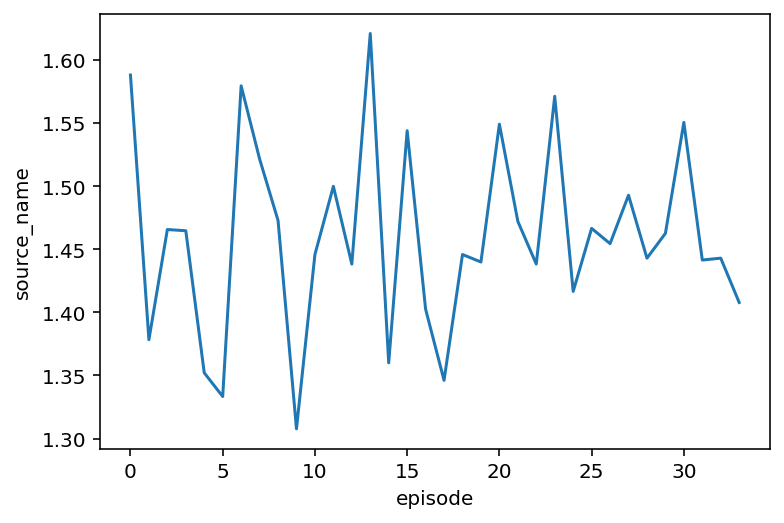

In [144]:
# Total aggregate: mean # of DCs per cust
mean_dcs_per_customer = deliveries.groupby(['episode','destination_name'])['source_name'].nunique().reset_index().groupby('episode')['source_name'].mean().reset_index()
sns.lineplot(data=mean_dcs_per_customer,x='episode',y='source_name')

In [147]:
deliveries.groupby(['destination_name'])['source_name'].nunique().reset_index().source_name.mean()

3.0

In [151]:
# Get top K (dc-customers) by customer variance, and also bottom k
# TODO PENDING DO THIS METRIC!!!!!!
np.array([5.0,5.0,5.0]).var()
np.array([0.0,15.0,0.0]).var()


0.0

50.0

In [166]:
deliveries.groupby(['destination_name'])['source_name'].nunique().reset_index()

,destination_name,source_name
0,c_10,3
1,c_100,3
2,c_101,3
3,c_102,3
4,c_11,3
...,...,...
95,c_95,3
96,c_96,3
97,c_97,3
98,c_98,3
